In [2]:
import sys
sys.path.append("/u/lukas.rilling/dev/")
import pandas as pd
import numpy as np
import glob
import os
from IPython.display import Audio
from IPython.core.display import display

import mimetypes
mimetypes.add_type("audio/ogg", ".ogg")

%load_ext autoreload
%autoreload 2

/var/tmp/ipykernel_4059881/2049839218.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [3]:
globs = [
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc768/*/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/",
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/*/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/",
    "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/*/*/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/conformer_coupling/raw_audio/ddi/glowTTS/tts_eval_gl/test-clean/forward/output/audio_files/",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/conformer_coupling/raw_audio/ddi/glowTTS_x_vector/tts_eval_gl/test-clean/forward/output/audio_files/",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2_conformer_coupling/enc768/200ep/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_simple_encoder/*/200ep/dec_drop_*/tts_eval_gl/forward/output/audio_files/",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/default/raw_audio/glowTTS_ASR_conformer_x_vector_v2_spec_augment*/tts_eval_gl/test-clean/forward/output/audio_files/",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/default/raw_audio/glowTTS_ASR_conformer_two_forward_pass*/tts_eval_gl/test-clean/forward/output/audio_files/",
    # "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc*/200ep/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/",
]
lr_files = []
for g in globs:
    lr_files += glob.glob(g)

common_prefix = os.path.commonpath(lr_files)
common_sufix = os.path.commonpath([l[::-1] for l in lr_files])[::-1]

names = []
for f in lr_files:
    names.append(f.removeprefix(common_prefix).removesuffix(common_sufix))

files = dict(zip(lr_files, names))

sequence_names = os.listdir(list(files.keys())[0])

files

{'/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc768/100ep/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/': '/glowTTS_x_vector_v2/enc768/100ep/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc768/200ep_long_cooldown/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/': '/glowTTS_x_vector_v2/enc768/200ep_long_cooldown/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc768/400ep/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/': '/glowTTS_x_vector_v2/enc768/400ep/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc768/200ep/dec_d

In [141]:
sequence_index = 102
sequence_name = sequence_names[sequence_index]

for folder, name in files.items():
    path = folder + sequence_name
    print(path)
    if os.path.exists(path):
        with open(folder.replace("forward/output/audio_files/", "nisqa_mos/average").replace("alias", "output")) as f:
            nisqa_result = f.readline()
        print(name)
        print("AutoMOS: " + nisqa_result)
        display(Audio(path))

/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc768/100ep/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/test-clean_1188-133604-0023_1188-133604-0023.ogg
/glowTTS_x_vector_v2/enc768/100ep/
AutoMOS: 3.181718836146358



/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc768/200ep_long_cooldown/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/test-clean_1188-133604-0023_1188-133604-0023.ogg
/glowTTS_x_vector_v2/enc768/200ep_long_cooldown/
AutoMOS: 3.212764627153152



/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc768/400ep/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/test-clean_1188-133604-0023_1188-133604-0023.ogg
/glowTTS_x_vector_v2/enc768/400ep/
AutoMOS: 3.300797877637179



/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS_x_vector_v2/enc768/200ep/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/test-clean_1188-133604-0023_1188-133604-0023.ogg
/glowTTS_x_vector_v2/enc768/200ep/
AutoMOS: 3.2574123507855752



/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/200ep/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/test-clean_1188-133604-0023_1188-133604-0023.ogg
/glowTTS/enc768/200ep/
AutoMOS: 3.3596264232244146



/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/100ep/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/test-clean_1188-133604-0023_1188-133604-0023.ogg
/glowTTS/enc768/100ep/
AutoMOS: 3.302589650658008



/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/joint_training/given_alignments/raw_audio/TTS_models/glowTTS/enc768/400ep/grad_clip_10/dec_drop_0.05/tts_eval_gl/test-clean/forward/output/audio_files/test-clean_1188-133604-0023_1188-133604-0023.ogg
/glowTTS/enc768/400ep/grad_clip_10/
AutoMOS: 3.351169210956677



In [150]:
from i6_experiments.users.rilling.experiments.librispeech.librispeech_glowtts.pytorch_networks.feature_extraction import DbMelFeatureExtraction, DbMelFeatureExtractionConfig

fe_config = DbMelFeatureExtractionConfig.from_dict({
        "sample_rate": 16000,
        "win_size": 0.05,
        "hop_size": 0.0125,
        "f_min": 60,
        "f_max": 7600,
        "min_amp": 1e-10,
        "num_filters": 80,
        "center": True,
        "norm": (-83.20164937973021, 34.14062855722116),
    })

fe = DbMelFeatureExtraction(fe_config)

In [151]:
import torchaudio

In [152]:
for folder, name in files.items():
    path = folder + sequence_name
    break
test = torchaudio.load(path)
test

(tensor([[-0.0029, -0.0012, -0.0003,  ...,  0.0098, -0.0023, -0.0016]]), 16000)

In [234]:
spec, len = fe(test[0], test[0].shape[0])
len

tensor(1, dtype=torch.int32)

In [247]:
spec[0].shape

torch.Size([1376, 80])

In [298]:
from torchaudio.functional import mask_along_axis
import copy

def apply_spec_aug(input, num_repeat_time, max_dim_time, num_repeat_feat, max_dim_feat):
    """
    :param Tensor input: the input audio features (B,T,F)
    :param int num_repeat_time: number of repetitions to apply time mask
    :param int max_dim_time: number of columns to be masked on time dimension will be uniformly sampled from [0, mask_param]
    :param int num_repeat_feat: number of repetitions to apply feature mask
    :param int max_dim_feat: number of columns to be masked on feature dimension will be uniformly sampled from [0, mask_param]
    """
    for _ in range(num_repeat_time):
        input = mask_along_axis(input, mask_param=max_dim_time, mask_value=0.0, axis=1)

    out1 = copy.deepcopy(input)
    for _ in range(num_repeat_feat):
        input = mask_along_axis(input, mask_param=max_dim_feat, mask_value=0.0, axis=2)
    return input, out1

In [299]:
def plot_spec(ax, s):
    shape = s.shape
    x = np.arange(0, shape[0]+1)
    y = np.arange(0, shape[1]+1)

    s2 = s.transpose(0,1)
    ax.pcolormesh(s2)

In [316]:
augment_spec, midstep = apply_spec_aug(spec, 20, 20, 5, 8)

In [317]:
import matplotlib.pyplot as plt
import librosa

%matplotlib widget


/var/tmp/ipykernel_4059881/4065018720.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3)


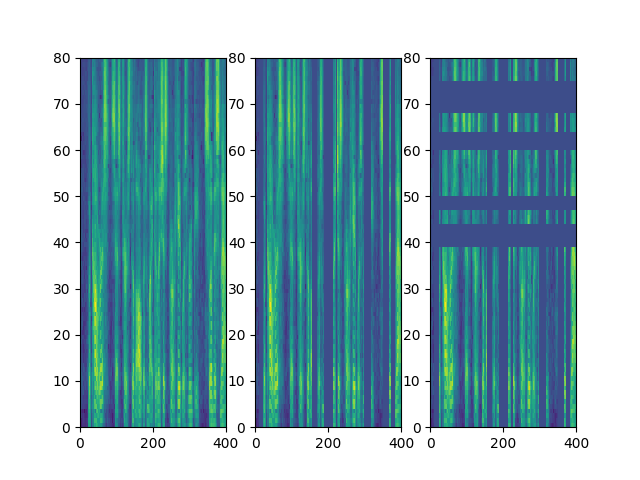

In [320]:
fig, ax = plt.subplots(1, 3)
plot_spec(ax[0], spec[0, :400])
plot_spec(ax[1], midstep[0, :400])
plot_spec(ax[2], augment_spec[0, :400])